Method 01 : Adaptive Skin Detection Using Statistical Color Analysis in YCrCb Space

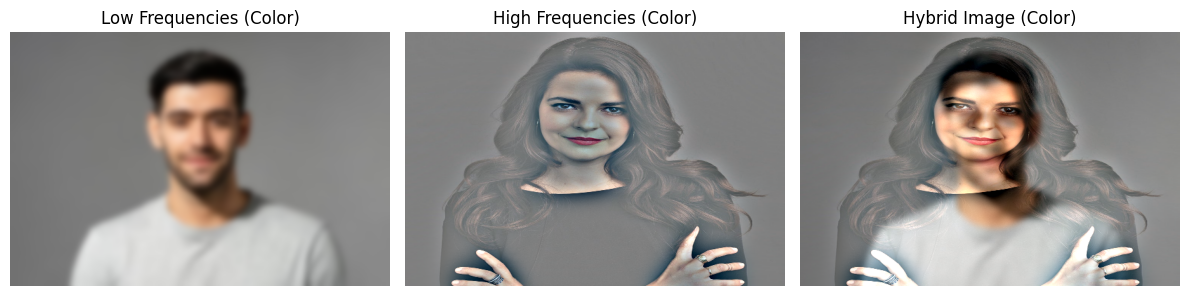

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_hybrid_image_color(low_img, high_img, low_sigma, high_sigma):
    # Convert images to float32 for precise calculations
    low_img = low_img.astype(np.float32)
    high_img = high_img.astype(np.float32)

    # Split images into color channels (BGR format in OpenCV)
    low_b, low_g, low_r = cv2.split(low_img)
    high_b, high_g, high_r = cv2.split(high_img)

    # Function to apply low-pass and high-pass filters
    def process_channel(low_channel, high_channel):
        low_frequencies = cv2.GaussianBlur(low_channel, (0, 0), low_sigma)
        low_for_high = cv2.GaussianBlur(high_channel, (0, 0), high_sigma)
        high_frequencies = high_channel - low_for_high
        hybrid = low_frequencies + high_frequencies
        return np.clip(low_frequencies, 0, 255), np.clip(high_frequencies + 128, 0, 255), np.clip(hybrid, 0, 255)

    # Process each color channel separately
    low_b, high_b, hybrid_b = process_channel(low_b, high_b)
    low_g, high_g, hybrid_g = process_channel(low_g, high_g)
    low_r, high_r, hybrid_r = process_channel(low_r, high_r)

    # Merge channels back into BGR format
    low_frequencies = cv2.merge([low_b, low_g, low_r]).astype(np.uint8)
    high_frequencies = cv2.merge([high_b, high_g, high_r]).astype(np.uint8)
    hybrid_image = cv2.merge([hybrid_b, hybrid_g, hybrid_r]).astype(np.uint8)

    return low_frequencies, high_frequencies, hybrid_image

# Load images in COLOR
low_img = cv2.imread("Man.jpg" , cv2.IMREAD_COLOR)  # Low-frequency image
high_img = cv2.imread("Women.jpg" , cv2.IMREAD_COLOR)  # High-frequency image

# Ensure both images have the same dimensions
if low_img.shape != high_img.shape:
    high_img = cv2.resize(high_img, (low_img.shape[1], low_img.shape[0]))

# Set sigma values for Gaussian filters
low_sigma = 5    # Blur intensity for low frequencies
high_sigma = 15   # Cutoff for high frequencies

# Create hybrid image
low_frequencies, high_frequencies, hybrid_image = create_hybrid_image_color(low_img, high_img, low_sigma, high_sigma)

# Convert images to RGB for displaying in Matplotlib (since OpenCV uses BGR)
low_frequencies_rgb = cv2.cvtColor(low_frequencies, cv2.COLOR_BGR2RGB)
high_frequencies_rgb = cv2.cvtColor(high_frequencies, cv2.COLOR_BGR2RGB)
hybrid_image_rgb = cv2.cvtColor(hybrid_image, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(low_frequencies_rgb)
plt.title('Low Frequencies (Color)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(high_frequencies_rgb)
plt.title('High Frequencies (Color)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(hybrid_image_rgb)
plt.title('Hybrid Image (Color)')
plt.axis('off')

plt.tight_layout()
plt.show()


Method 02 : Hybrid Image Generation Using Multi-Frequency Blending in Color Images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


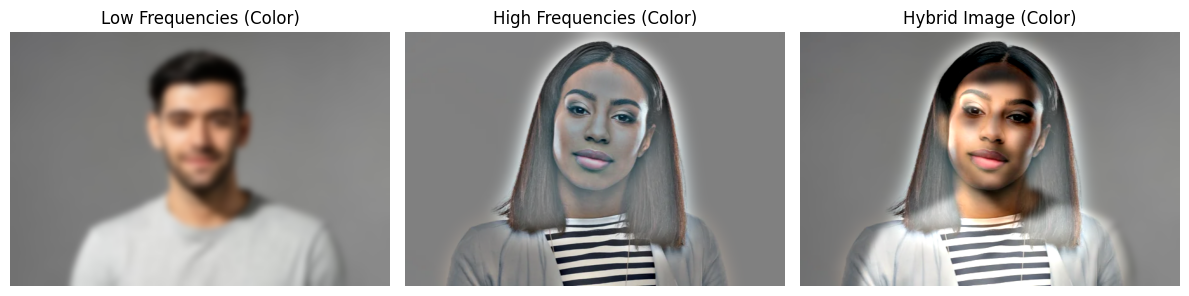

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_hybrid_image_color(low_img, high_img, low_sigma, high_sigma):
    # Convert images to float32 for precise calculations
    low_img = low_img.astype(np.float32)
    high_img = high_img.astype(np.float32)

    # Split images into color channels (BGR format in OpenCV)
    low_b, low_g, low_r = cv2.split(low_img)
    high_b, high_g, high_r = cv2.split(high_img)

    # Function to apply low-pass and high-pass filters
    def process_channel(low_channel, high_channel, low_sigma, high_sigma):
        # Apply Gaussian blur for low-pass filter
        low_frequencies = cv2.GaussianBlur(low_channel, (0, 0), low_sigma)
        # Apply Gaussian blur for high-pass filter
        low_for_high = cv2.GaussianBlur(high_channel, (0, 0), high_sigma)
        high_frequencies = high_channel - low_for_high
        hybrid = low_frequencies + high_frequencies
        return np.clip(low_frequencies, 0, 255), np.clip(high_frequencies + 128, 0, 255), np.clip(hybrid, 0, 255)

    # Process each color channel separately
    low_b, high_b, hybrid_b = process_channel(low_b, high_b, low_sigma, high_sigma)
    low_g, high_g, hybrid_g = process_channel(low_g, high_g, low_sigma, high_sigma)
    low_r, high_r, hybrid_r = process_channel(low_r, high_r, low_sigma, high_sigma)

    # Merge channels back into BGR format
    low_frequencies = cv2.merge([low_b, low_g, low_r]).astype(np.uint8)
    high_frequencies = cv2.merge([high_b, high_g, high_r]).astype(np.uint8)
    hybrid_image = cv2.merge([hybrid_b, hybrid_g, hybrid_r]).astype(np.uint8)

    return low_frequencies, high_frequencies, hybrid_image

# Load images in COLOR
low_img = cv2.imread("/content/drive/MyDrive/low_image2.jpg", cv2.IMREAD_COLOR)  # Low-frequency image
high_img = cv2.imread("/content/drive/MyDrive/high_image3.jpg", cv2.IMREAD_COLOR)  # High-frequency image

# Ensure both images have the same dimensions
if low_img.shape != high_img.shape:
    high_img = cv2.resize(high_img, (low_img.shape[1], low_img.shape[0]))

# Set sigma values for Gaussian filters
low_sigma = 5    # Blur intensity for low frequencies
high_sigma = 15  # Cutoff for high frequencies

# Create hybrid image
low_frequencies, high_frequencies, hybrid_image = create_hybrid_image_color(low_img, high_img, low_sigma, high_sigma)

# Convert images to RGB for displaying in Matplotlib (since OpenCV uses BGR)
low_frequencies_rgb = cv2.cvtColor(low_frequencies, cv2.COLOR_BGR2RGB)
high_frequencies_rgb = cv2.cvtColor(high_frequencies, cv2.COLOR_BGR2RGB)
hybrid_image_rgb = cv2.cvtColor(hybrid_image, cv2.COLOR_BGR2RGB)

# Display images
plt.figure(figsize=(12, 4))

# Low frequencies display
plt.subplot(1, 3, 1)
plt.imshow(low_frequencies_rgb)
plt.title('Low Frequencies (Color)')
plt.axis('off')

# High frequencies display
plt.subplot(1, 3, 2)
plt.imshow(high_frequencies_rgb)
plt.title('High Frequencies (Color)')
plt.axis('off')

# Hybrid image display
plt.subplot(1, 3, 3)
plt.imshow(hybrid_image_rgb)
plt.title('Hybrid Image (Color)')
plt.axis('off')

# Ensure good layout and display
plt.tight_layout()
plt.show()
